In [3]:
import cv2
import numpy as np 
import plotly.express as px
import os
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time
import cmath
from scipy import signal
from scipy import misc
from sortedcontainers import SortedList
import sys
sys.setrecursionlimit(10000)

#Q2 Connected Components

In [10]:
def unite(a, linked):
    if linked[a] == a:
        return a
    else:
        linked[a] = unite(linked[a], linked)
        return linked[a]


def unionSet(a, b, linked):
    linked[unite(a, linked)] = unite(b, linked)


def connComponents(im):
    next_label = 1;
    labels = np.zeros(im.shape, dtype=int)
    linked = [0]
    h, w = im.shape
    for row in range(h):
        for column in range(w):
            if im[row, column] != 0:
                neighbors = []
                if row > 0:
                    if im[row-1][column] == im[row, column]:
                        neighbors.append((row-1, column))
                if row > 0 and column + 1 < im.shape[1]:
                    if im[row-1, column+1] == im[row, column]:
                        neighbors.append((row-1, column+1))
                if row > 0 and column > 0:
                    if im[row-1, column-1] == im[row, column]:
                        neighbors.append((row-1, column-1))
                if column > 0:
                    if (im[row, column-1] == im[row, column]):
                        neighbors.append((row, column-1))

                if len(neighbors) == 0:
                    linked.append(next_label)
                    labels[row, column] = next_label
                    next_label += 1
                
                else:
                    L = [labels[r, c] for r, c in neighbors]
                    labels[row, column] = min(L)
                    for label in L:
                        unionSet(label, labels[row, column], linked)
                        
    for row in range(im.shape[0]):
        for column in range(im.shape[1]):
            if im[row, column] != 0:
                labels[row, column] = unite(labels[row, column], linked)
    return labels

Text(0.5, 1.0, 'components')

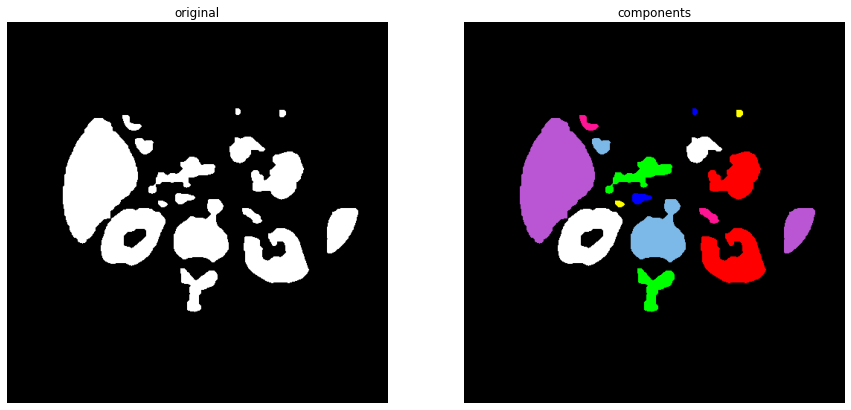

In [11]:
kidney = cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip3/images/kidney.jpg", cv2.IMREAD_GRAYSCALE)
kidney = (kidney > 132).astype(np.uint8)
kidney = cv2.morphologyEx(kidney, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 6)))
kidney = cv2.morphologyEx(kidney, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)))
kidney = cv2.erode(kidney, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2)), iterations = 3)
# plt.imshow(kidney,cmap='gray')
COLORS = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255,20,147), (186,85,211), (255, 255, 255), (124,185,232), (196,98,16)]

output = np.zeros((kidney.shape[0], kidney.shape[1], 3))
conn = connComponents(kidney)
keys = np.unique(conn)
vals = list(range(1,len(keys) + 1))
dic = dict(zip(keys, vals))
for c in range(len(vals)):
    for i in range(kidney.shape[0]):
        for j in range(kidney.shape[1]):
            if conn[i][j] != 0:
                c = dic[conn[i][j]]
                output[i][j][0] = COLORS[c % 8][0]
                output[i][j][1] = COLORS[c % 8][1]
                output[i][j][2] = COLORS[c % 8][2]
output = output.astype(np.uint8)
fig, sub = plt.subplots(1, 2,figsize=(15,15))
sub[0].imshow(kidney,cmap='gray')
sub[0].axis('off')
sub[0].set_title('original')

sub[1].imshow(output)
sub[1].axis('off')
sub[1].set_title('components')

#Q3 Coins
Read in the binary image coins.jpg and write a script which uses the image
as input and outputs a new image containing


In [14]:
im = cv2.imread('/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip3/images/coins.jpg', 0)
im = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)[1]
im = np.array(im, np.uint8)
im[im > 0] = 1

# Get size of one coin
sh=im.shape
vis = np.zeros(sh)
newim = np.zeros(sh, np.uint)
dfs(202, 11, 1)
unique, counts = np.unique(newim, return_counts=True)
d = dict(zip(unique, counts))
sz = int(round(d[1] / 100) * 100)

In [13]:
def dfs(x, y, cl):
    c = 0
    if vis[x][y] != 0:
        return c
    if im[x][y] == 0:
        return c
    vis[x][y] = 1
    newim[x, y] = cl
    if x != 0:
        c += dfs(x - 1, y, cl)
    if x != sh[0] - 1:
        c += dfs(x + 1, y, cl)
    if y != 0:
        c += dfs(x, y - 1, cl)
    if y != sh[1] - 1:
        c += dfs(x, y + 1, cl)
    return c + 1

####1
only the coins touching the boundary of the image

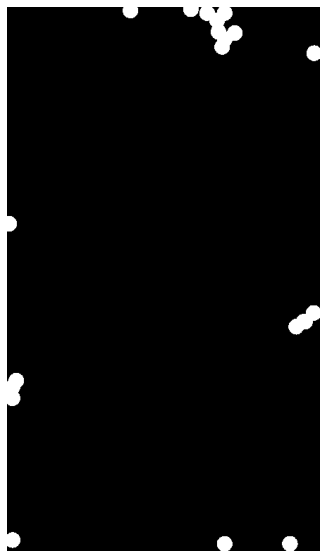

In [15]:
vis = np.zeros(sh)
newim = np.zeros(sh, np.uint)
for i in range(sh[1]):
    temp = dfs(0, i, 1)
    temp = dfs(sh[0] - 1, i, 1)
for i in range(sh[0]):
    temp = dfs(i, 0, 1)
    temp = dfs(i, sh[1] - 1, 1)
plt.figure(figsize=(10,10))
plt.imshow(newim, cmap='gray')
plt.axis('off')
plt.show()

####2
only the coins which overlap with each other

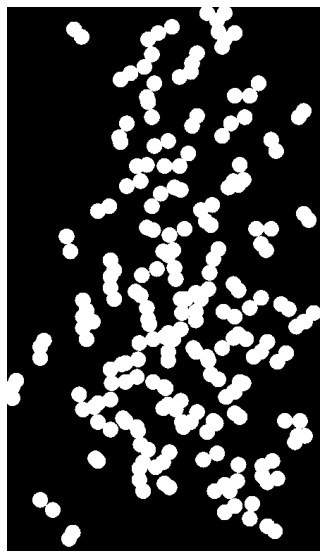

In [16]:
vis = np.zeros(sh)
newim = np.zeros(sh, np.uint)
for i in range(sh[0]):
    for j in range(sh[1]):
        c = dfs(i, j, 2)
        if c == 0:
            continue
        if c <= sz:
            indexes = np.where(newim == 2)
            newim[indexes] = 0
        else:
            indexes = np.where(newim == 2)
            newim[indexes] = 1
            
plt.figure(figsize=(10,10))
plt.imshow(newim, cmap='gray')
plt.axis("off")
plt.show()

####3
only non-overlapping coins

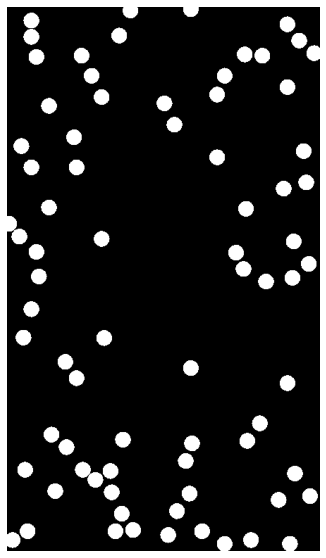

In [17]:
vis = np.zeros(sh)
newim = np.zeros(sh, np.uint)
for i in range(sh[0]):
    for j in range(sh[1]):
        c = dfs(i, j, 2)
        if c == 0:
            continue
        if c <= sz:
            indexes = np.where(newim == 2)
            newim[indexes] = 1
        else:
            indexes = np.where(newim == 2)
            newim[indexes] = 0
            
plt.figure(figsize=(10,10))
plt.imshow(newim, cmap='gray')
plt.axis("off")
plt.show()

#Q4 Objects
 Read in the binary image objects.png and write a script which uses the
image as input and uses morphological and logical operations to answer the questions
below.


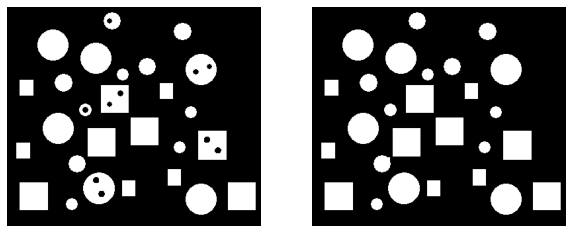

In [24]:
im=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip3/images/objects.png",0)
bim = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)[1]
bim = np.array(bim, np.uint8)
bim[bim > 0] = 1
cl_bim = cv2.morphologyEx(bim, cv2.MORPH_CLOSE, np.ones((7, 9)))
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(bim, cmap='gray')
plt.axis("off")
plt.subplot(122)
plt.imshow(cl_bim, cmap='gray')
plt.axis("off")
plt.show()

In [19]:
sh = bim.shape
vis = np.zeros(sh)
newim = np.zeros(sh, np.uint)
def dfs(x, y, cl, req):
    c = 0
    if vis[x][y] != 0:
        return c
    if req[x][y] == 0:
        return c
    vis[x][y] = 1
    newim[x, y] = cl
    if x != 0:
        c += dfs(x - 1, y, cl, req)
    if x != sh[0] - 1:
        c += dfs(x + 1, y, cl, req)
    if y != 0:
        c += dfs(x, y - 1, cl, req)
    if y != sh[1] - 1:
        c += dfs(x, y + 1, cl, req)
    return c + 1

####1
How many objects have one or more holes?

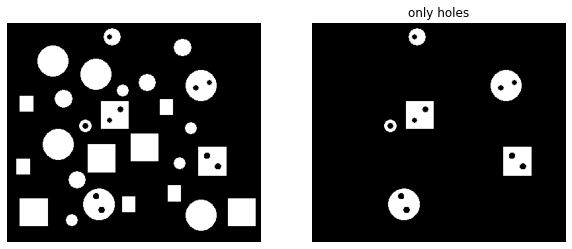

6


In [26]:
holes = cl_bim - bim
holes = cv2.morphologyEx(holes, cv2.MORPH_OPEN, np.ones((3, 3)))
vis = np.zeros(sh)
newim = np.zeros(sh, np.uint)
c = 0
for i in range(sh[0]):
    for j in range(sh[1]):
        if holes[i][j] == 1:
            if vis[i][j] == 0:
                c += 1
            dfs(i, j, 1, cl_bim)

newim_holes = np.logical_and(newim, bim)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(bim, cmap='gray')
plt.axis("off")
plt.subplot(122)
plt.imshow(newim_holes, cmap='gray')
plt.title("only holes")
plt.axis("off")
plt.show()
print(str(c))

####2
How many square objects are in the image?

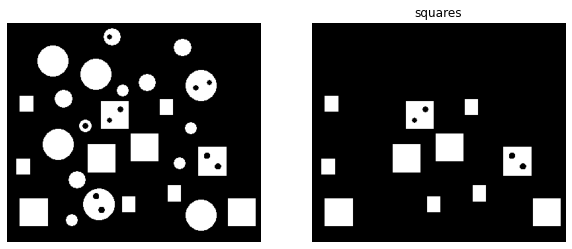

11


In [27]:
fil = np.array([[0, 0, 0],[1, 1, 0],[1, 1, 0]])
vis = np.zeros(sh)
newim = np.zeros(sh, np.uint)
def conv(im, fil):
    newim = np.copy(im)
    im = np.pad(im, (1, 1), 'constant')
    for i in range(1, im.shape[0] - 1):
        for j in range(1, im.shape[1] - 1):
            part = im[i - 1: i + 2, j - 1: j + 2]
            f = 0
            for x in range(np.shape(part)[0]):
                for y in range(np.shape(part)[1]):
                    if part[x][y] != fil[x][y]:
                        f = 1
            if f == 0:
                newim[i - 1, j - 1] = 1
            else:
                newim[i - 1, j - 1] = 0
    return newim

c = 0
corners = conv(bim, fil)
for i in range(sh[0]):
    for j in range(sh[1]):
        if corners[i][j] == 1:
            if vis[i][j] == 0:
                c += 1
            dfs(i, j, 1, bim)

newim_squares = newim
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(bim, cmap='gray')
plt.axis("off")
plt.subplot(122)
plt.imshow(newim_squares, cmap='gray')
plt.title("squares")
plt.axis("off")
plt.show()
print(str(c))

####3
Identify the square objects that have holes.

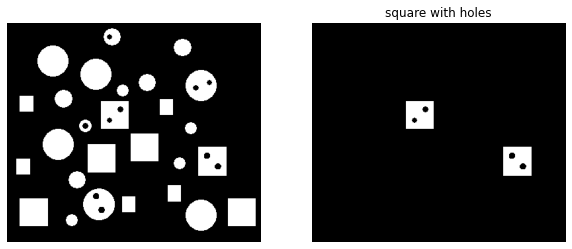

In [28]:
newim_sqs_and_holes = np.logical_and(newim_holes, newim_squares)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(bim, cmap='gray')
plt.axis("off")
plt.subplot(122)
plt.imshow(newim_sqs_and_holes, cmap='gray')
plt.title("square with holes")
plt.axis("off")
plt.show()

####4
Identify the circular objects that have no holes

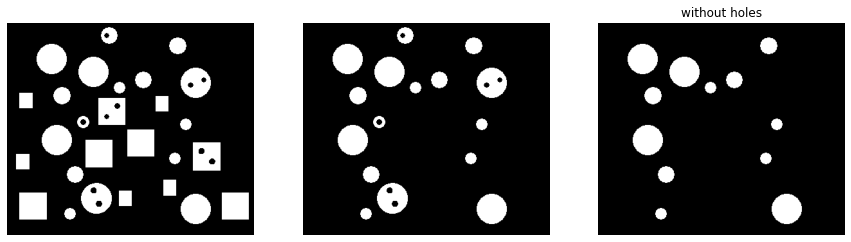

In [29]:
newim_circles = bim - newim_squares
newim_circles_holes = np.logical_and(newim_circles, newim_holes)
newim_circles_no_holes = newim_circles - newim_circles_holes

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(bim, cmap='gray')
plt.axis("off")
plt.subplot(132)
plt.imshow(newim_circles, cmap='gray')
plt.axis("off")
plt.subplot(133)
plt.imshow(newim_circles_no_holes, cmap='gray')
plt.axis("off")
plt.title("without holes")
plt.show()

#Q5 Colorful Text

####1
(20 points) The image colourful text.png contains text characters in five different
colors. Write a script which takes the image as input and outputs the number of
components for each of the five colors. Note that the components may be non-letters
(e.g. . and |).

In [31]:
image = cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip3/images/colourful_text.png",0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image[15:-15,15:-15]

im = np.copy(image)
rows, cols, channels = im.shape
color = []
mx_count = 0
im = np.reshape(im, [np.shape(im)[0] * np.shape(im)[1], 3])
color, counts = np.unique(im, axis=0, return_counts=True)
ind = counts.argsort()
clrs = color[ind][-6:][:5]

In [32]:
im = []
for i in range(5):
    im.append(np.zeros(image.shape[:2]))
for c in range(5):
    for i in range(im[c].shape[0]):
        for j in range(im[c].shape[1]):
            if (image[i][j] == clrs[c]).all():
                im[c][i][j] = 1

sh = im[0].shape
vis = np.zeros(sh)
newim = np.zeros(sh, np.uint)
def dfs(x, y, cl, req):
    c = 0
    if x < 0 or x >= sh[0] or y < 0 or y >= sh[1]:
        return c
    if vis[x][y] != 0:
        return c
    if req[x][y] == 0:
        return c
    vis[x][y] = 1
    newim[x, y] = cl
    c += dfs(x - 1, y, cl, req)
    c += dfs(x + 1, y, cl, req)
    c += dfs(x, y - 1, cl, req)
    c += dfs(x, y + 1, cl, req)
    c += dfs(x + 1, y + 1, cl, req)
    c += dfs(x + 1, y - 1, cl, req)
    c += dfs(x - 1, y + 1, cl, req)
    c += dfs(x - 1, y - 1, cl, req)
    return c + 1

In [33]:
comps = []
for c in range(len(im)):
    ans = 0
    sh = im[c].shape
    vis = np.zeros(sh)
    newim = np.zeros(sh, np.uint)
    for i in range(im[c].shape[0]):
        for j in range(im[c].shape[1]):
            sz = dfs(i, j, 1, im[c])
            if sz > 0:
                ans += 1
    comps.append(ans)

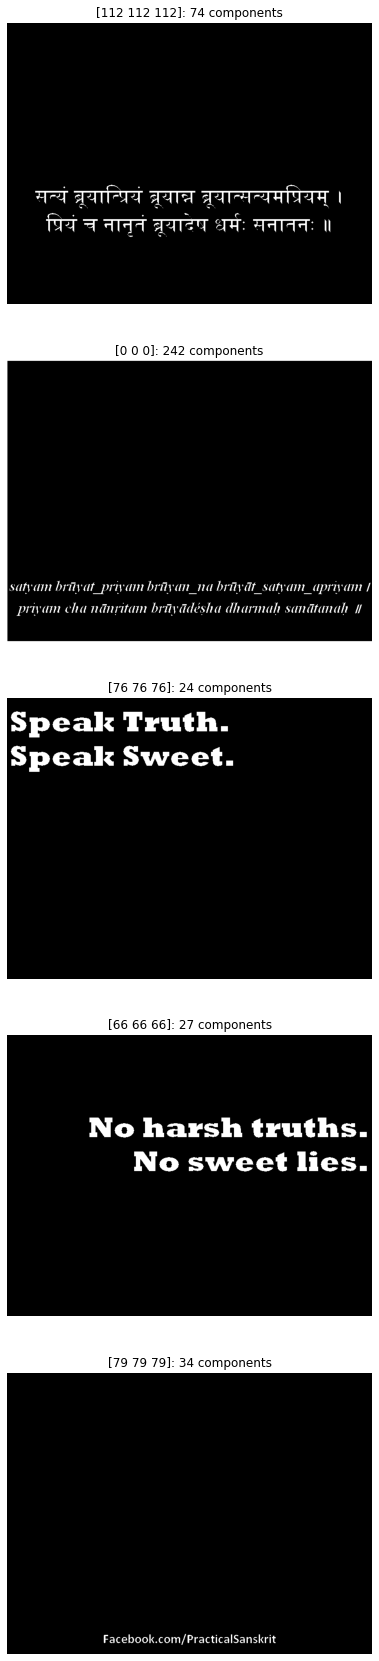

In [39]:
plt.figure(figsize=(30,30))
for c in range(len(im)):
    loc = "51" + str(c)
    plt.subplot(loc)
    plt.imshow(im[c], cmap='gray')
    plt.title("{}: {} components".format(clrs[c], comps[c]))
    plt.axis("off")
plt.show()

####2
For telugu.jpeg and tamil.jpeg write a script which produces a
binary image containing

(a) Only those letters that enclose one empty region (e.g. examples of English
letters containing a single empty region are - o,e,a)

In [40]:
im1 = cv2.imread('/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip3/images/telugu.jpeg',0)
im1 = cv2.adaptiveThreshold(im1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,23,13)
im1 = (im1/255).astype(np.uint8)

im2 = cv2.imread('/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip3/images/tamil.jpeg',0)
im2 = cv2.adaptiveThreshold(im2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,25,19)
im2 = (im2/255).astype(np.uint8)

In [41]:
sh2 = im[0].shape
vis2 = np.zeros(sh)
newim2 = np.zeros(sh, np.uint)
def dfs2(x, y, cl, req):
    c = 0
    if x < 0 or x >= sh2[0] or y < 0 or y >= sh2[1]:
        return c
    if vis2[x][y] != 0:
        return c
    if req[x][y] == 0:
        return c
    vis2[x][y] = 1
    newim2[x, y] = cl
    c += dfs2(x - 1, y, cl, req)
    c += dfs2(x + 1, y, cl, req)
    c += dfs2(x, y - 1, cl, req)
    c += dfs2(x, y + 1, cl, req)
    return c + 1

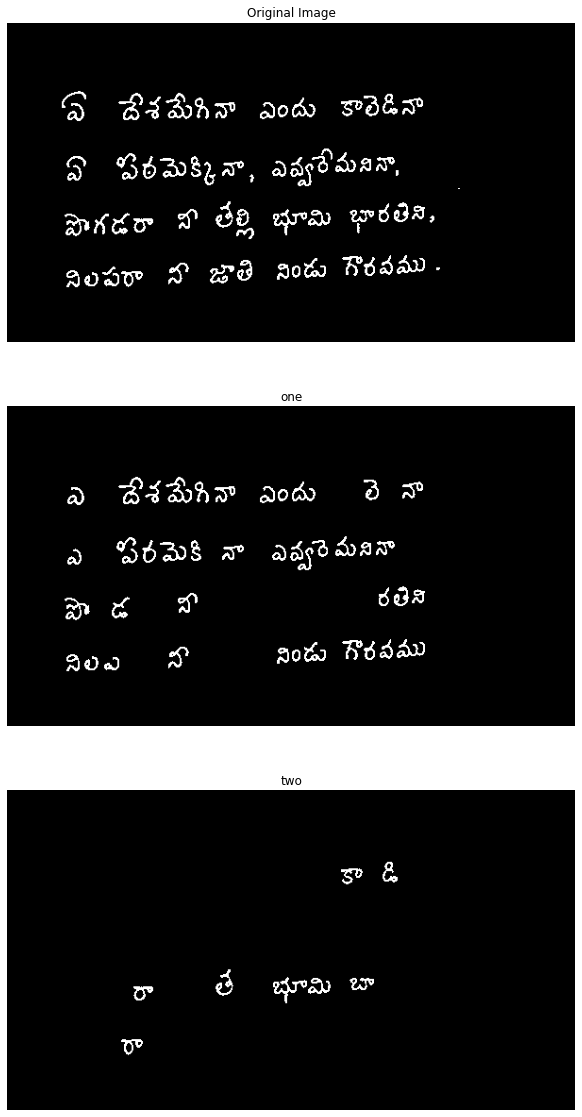

letters with one42
letters with two8


In [43]:
sh = im1.shape
vis = np.zeros(sh)
out_one = []
out_two = []
for i in range(sh[0]):
    for j in range(sh[1]):
        newim = np.zeros(sh, np.uint)
        c = dfs(i, j, 1, im1)
        if c > 0:
            tempim = newim
            temp2 = np.copy(1 - tempim)
            indexes = np.where(temp2 == 0)
            min_x = np.min(indexes[0])
            max_x = np.max(indexes[0])
            min_y = np.min(indexes[1])
            max_y = np.max(indexes[1])
            newim2 = temp2[min_x - 5:max_x + 5, min_y - 5: max_y + 5]
            sh2 = np.shape(newim2)
            vis2 = np.zeros(sh2)
            f = 0
            for x in range(sh2[0]):
                for y in range(sh2[1]):
                    c = dfs2(x, y, 1, newim2)
                    if c > 0:
                        f += 1
            if f == 2:
                out_one.append(indexes)
            elif f == 3:
                out_two.append(indexes)

holes_one = np.zeros(im1.shape)
for ind in out_one:
    holes_one[ind] = 1

holes_two = np.zeros(im1.shape)
for ind in out_two:
    holes_two[ind] = 1

plt.figure(figsize=(30, 20))
plt.subplot(311)
plt.imshow(im1, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(312)
plt.imshow(holes_one, cmap='gray')
plt.title("one")
plt.axis("off")
plt.subplot(313)
plt.imshow(holes_two, cmap='gray')
plt.title("two")
plt.axis("off")
plt.show()
print("letters with one" + str(len(out_one)))
print("letters with two" + str(len(out_two)))

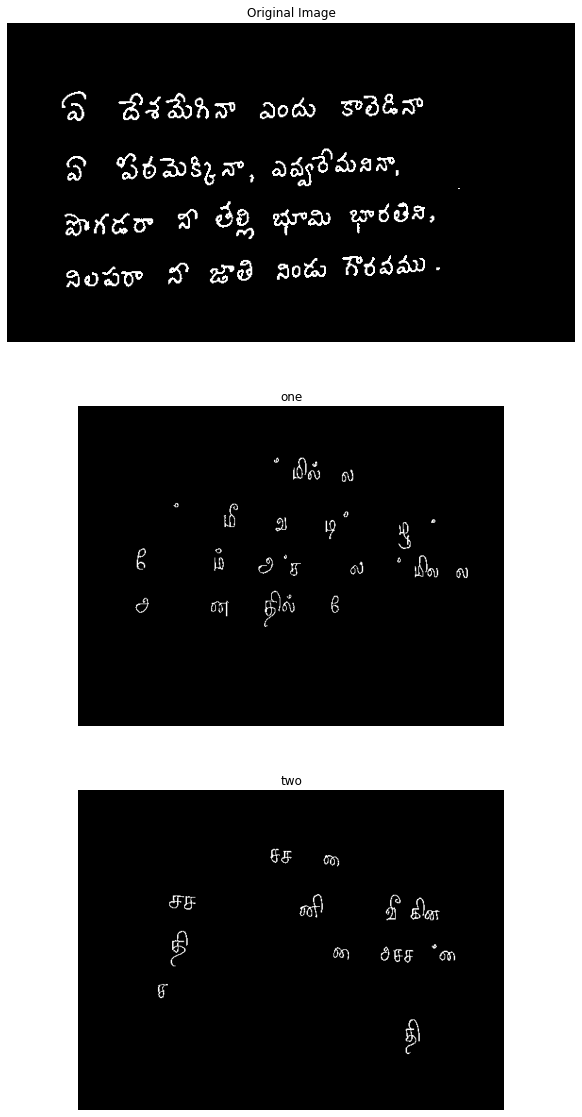

letters with one29
letters with two18


In [44]:
sh = im2.shape
vis = np.zeros(sh)
out_one = []
out_two = []
for i in range(sh[0]):
    for j in range(sh[1]):
        newim = np.zeros(sh, np.uint)
        c = dfs(i, j, 1, im2)
        if c > 0:
            tempim = newim
            temp2 = np.copy(1 - tempim)
            indexes = np.where(temp2 == 0)
            min_x = np.min(indexes[0])
            max_x = np.max(indexes[0])
            min_y = np.min(indexes[1])
            max_y = np.max(indexes[1])
            newim2 = temp2[min_x - 5:max_x + 5, min_y - 5: max_y + 5]
            sh2 = np.shape(newim2)
            vis2 = np.zeros(sh2)
            f = 0
            for x in range(sh2[0]):
                for y in range(sh2[1]):
                    c = dfs2(x, y, 1, newim2)
                    if c > 0:
                        f += 1
            if f == 2:
                out_one.append(indexes)
            elif f == 3:
                out_two.append(indexes)

holes_one = np.zeros(im2.shape)
for ind in out_one:
    holes_one[ind] = 1

holes_two = np.zeros(im2.shape)
for ind in out_two:
    holes_two[ind] = 1
    
plt.figure(figsize=(30, 20))
plt.subplot(311)
plt.imshow(im1, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(312)
plt.imshow(holes_one, cmap='gray')
plt.title("one")
plt.axis("off")
plt.subplot(313)
plt.imshow(holes_two, cmap='gray')
plt.title("two")
plt.axis("off")
plt.show()
print("letters with one" + str(len(out_one)))
print("letters with two" + str(len(out_two)))

#Q6


####1
How do you upscale the label map by factor k?

We create an matrix with 0s of the new dimensions.

To correlate (x,y) values in the new image with the old one, we use backward mapping to ensure there are no holes. Using forward (normal) mapping may result in holes in the image.

To ensure there are no new intensities/colors introduced in the image when scaling, we perform nearest neighbour interpolation instead of averaging to ensure the colors remain the same.

####2
How do you rotate the label map by θ?

The process remains the exact same, just that the empty matrix will be of different dimensions. Reverse mapping and nearest neighbour interpolation.


#Q7 Image Rotation

####1

. Write a function rotImage which rotates an input image about its center and takes
the following parameters:
• Input image
• Angle of rotation in degrees
• A boolean parameter, retain, such that,
– If it is true, you retain the original dimensions of the input image and crop
out all pixels that map to locations outside of these dimensions.
– If it is false, your output dimensions should accommodate the entire image
(without cropping) after rotation.1

In [1]:
def rotImage(img,x,crop):
    rad=(np.pi*x)/180
    a,b=img.shape
    x0,y0=a//2-1,b//2-1
    if crop:
        rad=-rad
        new_img=np.zeros((a,b))
        for i in range(a):
            for j in range(b):
                x1=int(x0 +(i-x0)*np.cos(rad)+(j-y0)*np.sin(rad))
                y1=int(y0 -(i-x0)*np.sin(rad)+(j-y0)*np.cos(rad))
                if ((x1<a and x1>=0) and (y1>=0 and y1<b)):
                    new_img[i,j]=img[x1,y1]  
        return new_img
    else:
        X1 = int(x0 -(x0)*np.abs(np.cos(rad))+(-y0)*np.abs(np.sin(rad)) )
        Y1 = int(y0 +(x0)*np.abs(np.sin(rad))+(b-1-y0)*np.abs(np.cos(rad)) )
        X2 = int(x0 +(a-1-x0)*np.abs(np.cos(rad))+(b-1-y0)*np.abs(np.sin(rad)) )
        Y2 = int(y0 -(a-1-x0)*np.abs(np.sin(rad))+(-y0)*np.abs(np.cos(rad)) )
        k1 = abs(X1)
        k2 = abs(Y2)
        m = abs(X1)+abs(X2)
        n = abs(Y1)+abs(Y2)   
        T=np.array( [[np.cos(rad) , np.sin(rad), x0],
                     [-np.sin(rad), np.cos(rad), y0],
                     [           0,           0,  1]],dtype='float64')
        T1 = np.linalg.inv(T)       
        new_img = np.zeros((m,n))
        for i in range(m):
            for j in range(n):         
                X = np.array([[i-k1],[j-k2], [1]])
                tem = T1@X
                x1 = int(x0+tem[0])
                y1 = int(y0+tem[1])
                if (x1<a and x1>=0 and y1>=0 and y1<b):
                    new_img[i,j]=img[x1,y1]
        return new_img

####2
Show outputs of a rectangular image of your choice with angle 30◦
, 45◦
, 90◦ and 2
other angles of your choice

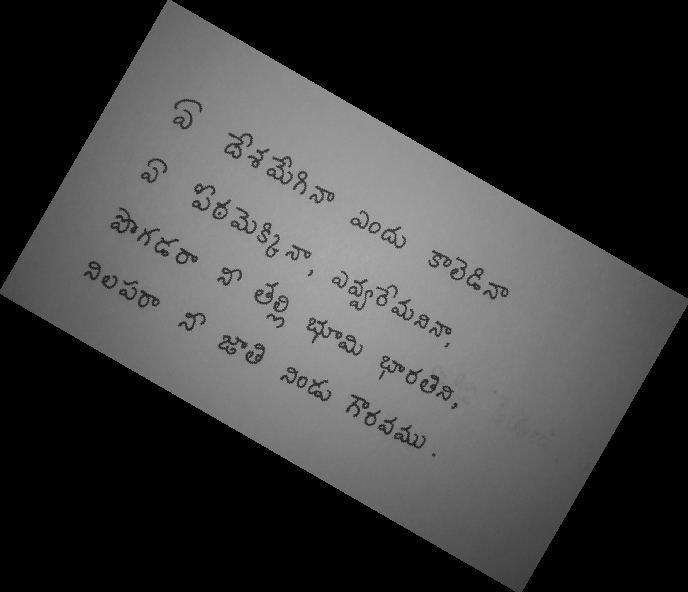

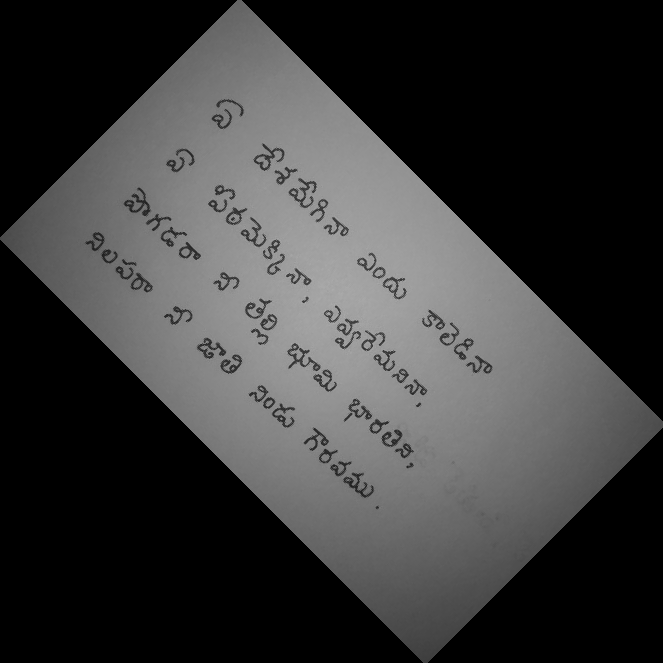

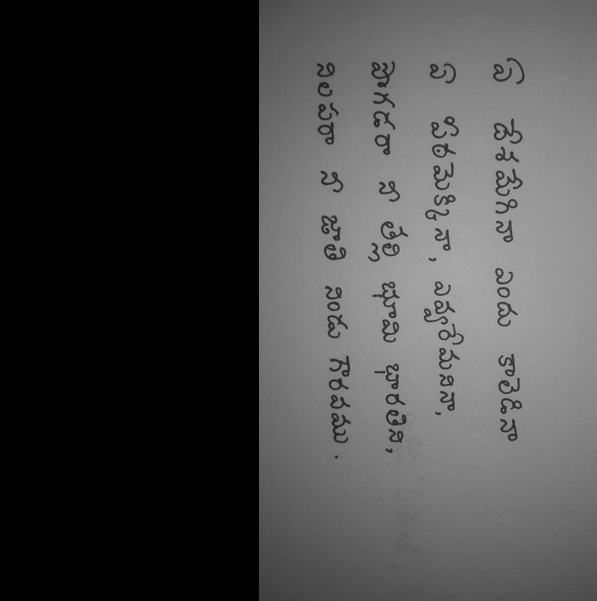

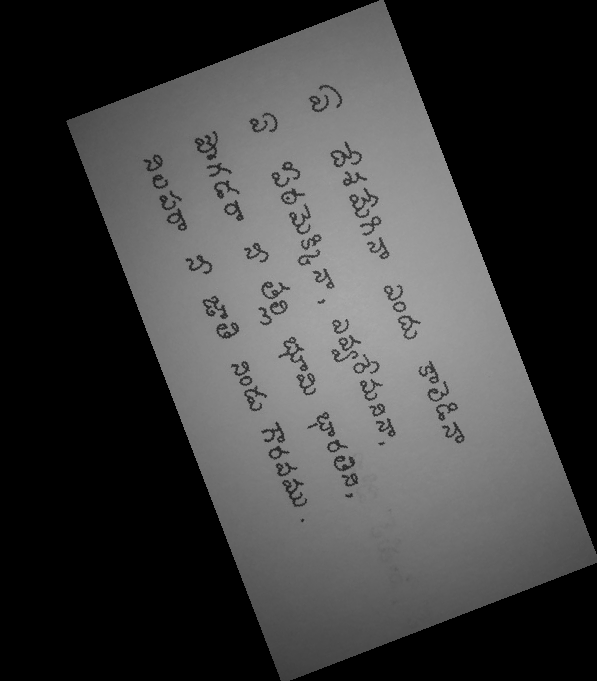

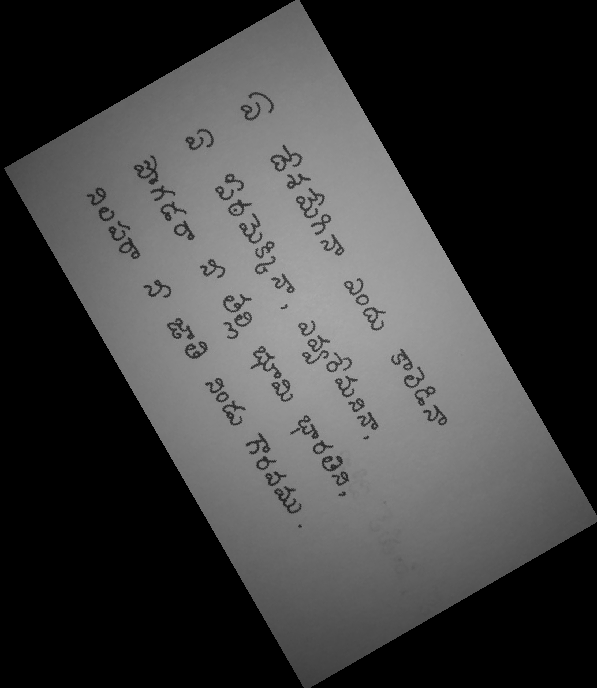

In [9]:
im=cv2.imread("/content/drive/My Drive/IIITH Assignments 3-1/DIP/dip3/images/telugu.jpeg",0)
rot1=rotImage(im,30,0)
cv2_imshow(rot1)
rot2=rotImage(im,45,0)
cv2_imshow(rot2)
rot3=rotImage(im,90,0)
cv2_imshow(rot3)
rot4=rotImage(im,69,0)
cv2_imshow(rot4)
rot5=rotImage(im,420,0)
cv2_imshow(rot5)
